LOAD DATA 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os 
from tqdm import tqdm
import matplotlib.image as mpimg
import random

In [3]:

data_path = 'task2_data'
file_count = len(os.listdir(data_path))

print(f"The number of scenarios under {data_path} is: {file_count}")

The number of scenarios under task2_data is: 287


In [ ]:
#########Your can use the following code for reference to load the data and visualize the scenario and agents#########
for file in tqdm(os.listdir(data_path)):

    info = np.load(data_path+'/'+file,allow_pickle=True)
    all_agent_trajs        = info['all_agent']    
    
    # You can run below code to see the shape of the all_agent_trajs
    #print("agents matrix shape is: ",all_agent_trajs.shape)  
    # agents matrix shape is:  (Na, 91, 10)
    # [Na agents, 91 timesteps the interval between each timestep is 0.1 second,\
    #10 denotes [center_x, center_y, center_z, boundingbox_x, boundingbox_y, boundingbox_z, heading, vel_x, vel_y, valid] ]
    #the valid flag is either 0 or 1 ; 1 means the valid, 0 means invalid
    obj_types              = info['object_type']
    lane_polylines         = info['lane']           #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    road_polylines         = info['road_polylines'] #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    crosswalk_polylines    = info['crosswalk']      #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    speed_bump_polylines   = info['speed_bump']     #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    stop_signs_polylines   = info['stop_sign']      #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    drive_way_polylines    = info['drive_way']      #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    sdc_track_id           = info['sdc_track_index']   #  the track id of the sdc
    scenario_id            = info['scenario_id']
    
    # We select the 11th timestep as the current timestep to predict the future trajectory of the agents
    all_agent_current = all_agent_trajs[:,10]
    # print(all_agent_current.shape)
    
    #ground truth for the future 3s,5s,8s can be easily derived by :
    predict_horizon = 80
    all_gt_future=all_agent_trajs[:,11:11+predict_horizon]
    all_gt_future.shape
    
    tracks = info['predict_list']   # the list of agent ids to predict, the agent id is the index in the all_agent_tra
    
    agents_to_predict = all_agent_trajs[tracks]
    ######################################################
    # The homework should be done on these agents_to_predict.
    # Visualize the agents_to_predict and the scenarios
    # You can use the following code to visualize the scenario
    # For agnets, you can use black color to represent the agents not in the tracks to predict, and use different colors for agents_to_predict
    # You can draw each agent as a rectangle, the center of the rectangle is the center_x and center_y, 
    # and the length and width of the rectangle is boundingbox_x and boundingbox_y
    # We provide a example fig for your reference.   example.png
    sdc_current_state = all_agent_trajs[sdc_track_id][10]
    ax = plt.gca()
    fig = plt.gcf()
    fig.set_facecolor('xkcd:grey') 
    ax.set_facecolor('xkcd:grey')
    for polyline in road_polylines:
        map_type = polyline[0,6]
        if map_type == 6:
            plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='dashed', linewidth=1)
        elif map_type == 7:
            plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
        elif map_type == 8:
            plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
        elif map_type == 9:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dashed', linewidth=1)
        elif map_type == 10:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dashed', linewidth=1)
        elif map_type == 11:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='solid', linewidth=1)
        elif map_type == 12:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='solid', linewidth=1)
        elif map_type == 13:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dotted', linewidth=1)
        elif map_type == 15:
            plt.plot(polyline[:, 0], polyline[:, 1], 'k', linewidth=1)
        elif map_type == 16:
            plt.plot(polyline[:, 0], polyline[:, 1], 'k', linewidth=1)
    
    # Crosswalk Polylines
    for polyline in crosswalk_polylines:
        plt.plot(polyline[:, 0], polyline[:, 1], 'blue', linestyle='solid', linewidth=1)
    
    # Lane Polylines
    for polyline in lane_polylines:
        plt.plot(polyline[:, 0], polyline[:, 1], 'none', linestyle='solid', linewidth=1)

        # Speed Bump Polylines
    for polyline in speed_bump_polylines:
        plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:orange', linestyle='solid', linewidth=2)
    
    # Stop Sign Polylines
    for polyline in stop_signs_polylines:
        x, y, z = polyline[0, :3]  # Extract X, Y, Z coordinates

        # Create an octagon (8-sided polygon)
        octagon = patches.RegularPolygon((x, y), numVertices=8, radius=2.5, 
                                        linewidth=2, edgecolor='red', facecolor='red')

        plt.gca().add_patch(octagon)  # Add octagon to the plot

    # Driveway Polylines
    for polyline in drive_way_polylines:
        plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:pink', linestyle='solid', linewidth=1)
    
    for idx, agent in enumerate(all_agent_current):
        center_x, center_y = agent[0], agent[1]
        bbox_x, bbox_y = agent[3], agent[4]
        heading = agent[6]  # Heading angle in radians
        
        # Determine color: red for agents to predict, black for others
        color = 'red' if idx in tracks else 'black'

        # Create agent rectangle
        rect = patches.Rectangle((-bbox_x / 2, -bbox_y / 2), bbox_x, bbox_y, linewidth=2,
                                edgecolor=color, facecolor=color)

        # Apply rotation and translation
        t = plt.gca().transData
        r = patches.transforms.Affine2D().rotate_deg(np.degrees(heading)).translate(center_x, center_y)
        rect.set_transform(r + t)

        ax.add_patch(rect)

# Plot ground truth future trajectories for agents where all future timesteps are valid
    for agent_idx in range(all_gt_future.shape[0]):  # Iterate over all agents
        valid_future = all_gt_future[agent_idx, :, -1]  # Extract the validity flag for future timesteps
        
        if np.all(valid_future == 1):  # Only plot if all future timesteps are valid
            future_traj = all_gt_future[agent_idx, :, :2]  # Extract future (x, y) positions
            color = 'green' if agent_idx in tracks else 'none'  # Green for agents to predict, white for others
            plt.plot(future_traj[:, 0], future_traj[:, 1], linestyle='dashed', color=color, linewidth=1)


        


    

    # 'TYPE_FREEWAY': 1,
    # 'TYPE_SURFACE_STREET': 2,
    # 'TYPE_BIKE_LANE': 3,

    # # for roadline
    # 'TYPE_UNKNOWN': -1,
    # 'TYPE_BROKEN_SINGLE_WHITE': 6,
    # 'TYPE_SOLID_SINGLE_WHITE': 7,
    # 'TYPE_SOLID_DOUBLE_WHITE': 8,
    # 'TYPE_BROKEN_SINGLE_YELLOW': 9,
    # 'TYPE_BROKEN_DOUBLE_YELLOW': 10,
    # 'TYPE_SOLID_SINGLE_YELLOW': 11,
    # 'TYPE_SOLID_DOUBLE_YELLOW': 12,
    # 'TYPE_PASSING_DOUBLE_YELLOW': 13,

    # # for roadedge
    # 'TYPE_ROAD_EDGE_BOUNDARY': 15,
    # 'TYPE_ROAD_EDGE_MEDIAN': 16,

    # # for stopsign
    # 'TYPE_STOP_SIGN': 17,

    # # for crosswalk
    # 'TYPE_CROSSWALK': 18,

    # # for speed bump
    # 'TYPE_SPEED_BUMP': 19,    
    
    # # for driveway
    # 'TYPE_DRIVEWAY': 20,
    ax.axis([-70+ sdc_current_state[0], 70+ sdc_current_state[0], -70+ sdc_current_state[1], 70 + sdc_current_state[1]])

    filename = f'visualization_original/{scenario_id}.png' 
    plt.savefig(filename)       
    plt.close()

100%|██████████| 287/287 [00:49<00:00,  5.79it/s]


Q1. Use a constant velocity model to predict the future trajectories of the target agents at 3s, 5s, and 8s. Then, calculate the Average Displacement Error (ADE) and Final Displacement Error (FDE). The results should be averaged across all target agents and scenarios.

In [ ]:
all_fde_3s = []
all_fde_5s = []
all_fde_8s = []
all_ade_3s = []
all_ade_5s = []
all_ade_8s = []

#########Your can use the following code for reference to load the data and visualize the scenario and agents#########
for file in tqdm(os.listdir(data_path)):
    

    info = np.load(data_path+'/'+file,allow_pickle=True)
    all_agent_trajs        = info['all_agent']    
    
    # You can run below code to see the shape of the all_agent_trajs
    #print("agents matrix shape is: ",all_agent_trajs.shape)  
    # agents matrix shape is:  (Na, 91, 10)
    # [Na agents, 91 timesteps the interval between each timestep is 0.1 second,\
    #10 denotes [center_x, center_y, center_z, boundingbox_x, boundingbox_y, boundingbox_z, heading, vel_x, vel_y, valid] ]
    #the valid flag is either 0 or 1 ; 1 means the valid, 0 means invalid
    obj_types              = info['object_type']
    lane_polylines         = info['lane']           #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    road_polylines         = info['road_polylines'] #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    crosswalk_polylines    = info['crosswalk']      #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    speed_bump_polylines   = info['speed_bump']     #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    stop_signs_polylines   = info['stop_sign']      #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    drive_way_polylines    = info['drive_way']      #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    sdc_track_id           = info['sdc_track_index']   #  the track id of the sdc
    scenario_id            = info['scenario_id']
    
    # We select the 11th timestep as the current timestep to predict the future trajectory of the agents
    all_agent_current = all_agent_trajs[:,10]
    # print(all_agent_current.shape)
    
    #ground truth for the future 3s,5s,8s can be easily derived by :
    predict_horizon = 80
    all_gt_future=all_agent_trajs[:,11:11+predict_horizon]
    all_gt_future.shape
    
    tracks        = info['predict_list']   # the list of agent ids to predict, the agent id is the index in the all_agent_trajs
    tracks
    agents_to_predict = all_agent_trajs[tracks]
    ######################################################
    # The homework should be done on these agents_to_predict.
    # Visualize the agents_to_predict and the scenarios
    # You can use the following code to visualize the scenario
    # For agnets, you can use black color to represent the agents not in the tracks to predict, and use different colors for agents_to_predict
    # You can draw each agent as a rectangle, the center of the rectangle is the center_x and center_y, 
    # and the length and width of the rectangle is boundingbox_x and boundingbox_y
    # We provide a example fig for your reference.   example.png
    sdc_current_state = all_agent_trajs[sdc_track_id][10]
    ax = plt.gca()
    fig = plt.gcf()
    fig.set_facecolor('xkcd:grey') 
    ax.set_facecolor('xkcd:grey')

    # Constants
    # dt = 0.1  # Time interval per timestep
    # predict_horizon = 80  # Number of future timesteps to predict (8 seconds)

    # # Extract positions and velocities from the current timestep (11th step)
    # initial_positions = all_agent_current[:, :2]  # x, y positions
    # velocities = all_agent_current[:, 7:9]  # vx, vy velocities

    # # Predict future positions using the constant velocity model
    # timesteps = np.arange(1, predict_horizon + 1).reshape(1, -1, 1)  # Shape: (1, 80, 1)
    # predicted_trajectories = initial_positions[:, np.newaxis, :] + velocities[:, np.newaxis, :] * dt * timesteps
    # #print(predicted_trajectories)

        # Constants
    dt = 0.1  # Time interval per timestep
    predict_horizon = 80  # Number of future timesteps to predict (8 seconds)

    # Extract observed trajectory (timesteps 0 to 10)
    observed_trajectory = all_gt_future[:, :11, :2]  # Shape: (Na, 11, 2)

    # Extract initial positions and velocities from the current timestep (11th step)
    initial_positions = all_agent_current[:, :2]  # x, y positions at timestep 11
    velocities = all_agent_current[:, 7:9]  # vx, vy velocities at timestep 11

    # Predict future positions using the constant velocity model
    timesteps = np.arange(1, predict_horizon + 1).reshape(1, -1, 1)  # Shape: (1, 80, 1)
    predicted_future = initial_positions[:, np.newaxis, :] + velocities[:, np.newaxis, :] * dt * timesteps

    # Combine past trajectory (first 11 timesteps) with predicted trajectory (next 80 timesteps)
    full_predicted_trajectories = np.concatenate((observed_trajectory, predicted_future), axis=1)  # Shape: (Na, 91, 2)

    # Time indices for 3s, 5s, 8s
    time_3s = int(3 / dt)  # 30 timesteps
    time_5s = int(5 / dt)  # 50 timesteps
    time_8s = int(8 / dt)  # 80 timesteps

    valid_agents = np.all(all_gt_future[:, :, -1] == 1, axis=1)  # Agents with all future timesteps valid

    # Extract ground truth final positions
    gt_positions_3s = all_gt_future[valid_agents, time_3s - 1, :2]
    gt_positions_5s = all_gt_future[valid_agents, time_5s - 1, :2]
    gt_positions_8s = all_gt_future[valid_agents, time_8s - 1, :2]

    # Extract predicted final positions
    pred_positions_3s = full_predicted_trajectories[valid_agents, 11 + time_3s - 1, :2]
    pred_positions_5s = full_predicted_trajectories[valid_agents, 11 + time_5s - 1, :2]
    pred_positions_8s = full_predicted_trajectories[valid_agents, 11 + time_8s - 1, :2]

    # Compute FDE
    fde_3s = np.linalg.norm(pred_positions_3s - gt_positions_3s, axis=1)
    fde_5s = np.linalg.norm(pred_positions_5s - gt_positions_5s, axis=1)
    fde_8s = np.linalg.norm(pred_positions_8s - gt_positions_8s, axis=1)


    # Compute ADE (average displacement error)
    # ade_3s = np.mean(np.linalg.norm(pred_positions_3s - gt_positions_3s, axis=2), axis=1)
    # ade_5s = np.mean(np.linalg.norm(pred_positions_5s - gt_positions_5s, axis=2), axis=1)
    # ade_8s = np.mean(np.linalg.norm(pred_positions_8s - gt_positions_8s, axis=2), axis=1)

    if len(fde_3s) > 0:
        mean_fde_3s = np.mean(fde_3s)
        mean_fde_5s = np.mean(fde_5s)
        mean_fde_8s = np.mean(fde_8s)

        # mean_ade_3s = np.mean(ade_3s)
        # mean_ade_5s = np.mean(ade_5s)
        # mean_ade_8s = np.mean(ade_8s)
    else:
        mean_fde_3s, mean_fde_5s, mean_fde_8s = float('nan'), float('nan'), float('nan')
        # mean_ade_3s, mean_ade_5s, mean_ade_8s = float('nan'), float('nan'), float('nan')

    all_fde_3s.append(mean_fde_3s)
    all_fde_5s.append(mean_fde_5s)
    all_fde_8s.append(mean_fde_8s)

    # all_ade_3s.append(mean_ade_3s)
    # all_ade_5s.append(mean_ade_5s)
    # all_ade_8s.append(mean_ade_8s)


    gt_positions_3s = all_gt_future[valid_agents, :time_3s, :2]  # Shape: (N, T, 2)
    gt_positions_5s = all_gt_future[valid_agents, :time_5s, :2]
    gt_positions_8s = all_gt_future[valid_agents, :time_8s, :2]

    pred_positions_3s = full_predicted_trajectories[valid_agents, 11:11 + time_3s, :2]  # Shape: (N, T, 2)
    pred_positions_5s = full_predicted_trajectories[valid_agents, 11:11 + time_5s, :2]
    pred_positions_8s = full_predicted_trajectories[valid_agents, 11:11 + time_8s, :2]



    # Compute ADE
    ade_3s = np.mean(np.linalg.norm(pred_positions_3s - gt_positions_3s, axis=2), axis=1)
    ade_5s = np.mean(np.linalg.norm(pred_positions_5s - gt_positions_5s, axis=2), axis=1)
    ade_8s = np.mean(np.linalg.norm(pred_positions_8s - gt_positions_8s, axis=2), axis=1)

    if len(fde_3s) > 0:
        mean_ade_3s = np.mean(ade_3s)
        mean_ade_5s = np.mean(ade_5s)
        mean_ade_8s = np.mean(ade_8s)
    else:
        mean_ade_3s, mean_ade_5s, mean_ade_8s = float('nan'), float('nan'), float('nan')

    all_ade_3s.append(mean_ade_3s)
    all_ade_5s.append(mean_ade_5s)
    all_ade_8s.append(mean_ade_8s)



    

    # print(f"Scenario ID: {info['scenario_id']}")
    # print(f" - FDE (3s): {mean_fde_3s:.3f} meters")
    # print(f" - FDE (5s): {mean_fde_5s:.3f} meters")
    # print(f" - FDE (8s): {mean_fde_8s:.3f} meters")

    # predicted_trajectories now has shape (Na, 80, 2), where:
    # Na = number of agents, 80 = timesteps, 2 = (x, y)
    for polyline in road_polylines:
        map_type = polyline[0,6]
        if map_type == 6:
            plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='dashed', linewidth=1)
        elif map_type == 7:
            plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
        elif map_type == 8:
            plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
        elif map_type == 9:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dashed', linewidth=1)
        elif map_type == 10:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dashed', linewidth=1)
        elif map_type == 11:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='solid', linewidth=1)
        elif map_type == 12:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='solid', linewidth=1)
        elif map_type == 13:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dotted', linewidth=1)
        elif map_type == 15:
            plt.plot(polyline[:, 0], polyline[:, 1], 'k', linewidth=1)
        elif map_type == 16:
            plt.plot(polyline[:, 0], polyline[:, 1], 'k', linewidth=1)
    
    # Crosswalk Polylines
    for polyline in crosswalk_polylines:
        plt.plot(polyline[:, 0], polyline[:, 1], 'blue', linestyle='solid', linewidth=1)
    
    # Lane Polylines
    for polyline in lane_polylines:
        plt.plot(polyline[:, 0], polyline[:, 1], 'none', linestyle='solid', linewidth=1)

        # Speed Bump Polylines
    for polyline in speed_bump_polylines:
        plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:orange', linestyle='solid', linewidth=2)
    
    # Stop Sign Polylines
    for polyline in stop_signs_polylines:
        x, y, z = polyline[0, :3]  # Extract X, Y, Z coordinates

        # Create an octagon (8-sided polygon)
        octagon = patches.RegularPolygon((x, y), numVertices=8, radius=2.5, 
                                        linewidth=2, edgecolor='red', facecolor='red')

        plt.gca().add_patch(octagon)  # Add octagon to the plot

    # Driveway Polylines
    for polyline in drive_way_polylines:
        plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:pink', linestyle='solid', linewidth=1)
    
    for idx, agent in enumerate(all_agent_current):
        center_x, center_y = agent[0], agent[1]
        bbox_x, bbox_y = agent[3], agent[4]
        heading = agent[6]  # Heading angle in radians
        
        # Determine color: red for agents to predict, black for others
        color = 'red' if idx in tracks else 'black'

        # Create agent rectangle
        rect = patches.Rectangle((-bbox_x / 2, -bbox_y / 2), bbox_x, bbox_y, linewidth=2,
                                edgecolor=color, facecolor=color)

        # Apply rotation and translation
        t = plt.gca().transData
        r = patches.transforms.Affine2D().rotate_deg(np.degrees(heading)).translate(center_x, center_y)
        rect.set_transform(r + t)

        ax.add_patch(rect)

    # Plot ground truth future trajectories for agents where all future timesteps are valid
    for agent_idx in range(all_gt_future.shape[0]):  # Iterate over all agents
        valid_future = all_gt_future[agent_idx, :, -1]  # Extract the validity flag for future timesteps
        
        if np.all(valid_future == 1):  # Only plot if all future timesteps are valid
            future_traj = all_gt_future[agent_idx, :, :2]  # Extract future (x, y) positions
            color = 'green' if agent_idx in tracks else 'none'  # Green for agents to predict, white for others
            plt.plot(future_traj[:, 0], future_traj[:, 1], linestyle='dashed', color=color, linewidth=4)

    # # Plot predicted trajectories using CVM
    # for agent_idx in range(predicted_trajectories.shape[0]):
    #     valid_future = all_gt_future[agent_idx, :, -1]  # Extract the validity flag for future timesteps
        
    #     if np.all(valid_future == 1):  # Only plot if all future timesteps are valid  
    #         color = 'purple' if agent_idx in tracks else 'none'  # Blue for predicted agents, cyan for others
    #         plt.plot(predicted_trajectories[agent_idx, :, 0], predicted_trajectories[agent_idx, :, 1], 
    #                 linestyle='solid', color=color, linewidth=2)

     #   Plot the full predicted trajectories
    # Plot predicted trajectories using CVM

    # Plot the full predicted trajectories
    for agent_idx in range(full_predicted_trajectories.shape[0]):
        valid_future = all_gt_future[agent_idx, :, -1]

        if np.all(valid_future == 1):
            color = 'purple' if agent_idx in tracks else 'none'   
            plt.plot(full_predicted_trajectories[agent_idx, :, 0], full_predicted_trajectories[agent_idx, :, 1], 
                    linestyle='solid', color=color, linewidth=2)



    ax.axis([-70+ sdc_current_state[0], 70+ sdc_current_state[0], -70+ sdc_current_state[1], 70 + sdc_current_state[1]])

    filename = f'visualization_results_CVM/{scenario_id}.png' 
    plt.savefig(filename)       
    plt.close()

print(f"Mean FDE (3s): {np.mean(all_fde_3s):.3f} meters")
print(f"Mean FDE (5s): {np.mean(all_fde_5s):.3f} meters")
print(f"Mean FDE (8s): {np.mean(all_fde_8s):.3f} meters")

print(f"Mean ADE (3s): {np.mean(all_ade_3s):.3f} meters")
print(f"Mean ADE (5s): {np.mean(all_ade_5s):.3f} meters")
print(f"Mean ADE (8s): {np.mean(all_ade_8s):.3f} meters")




100%|██████████| 287/287 [00:55<00:00,  5.19it/s]

Mean FDE (3s): 53.226 meters
Mean FDE (5s): 56.641 meters
Mean FDE (8s): 64.321 meters
Mean ADE (3s): 51.882 meters
Mean ADE (5s): 53.087 meters
Mean ADE (8s): 55.819 meters


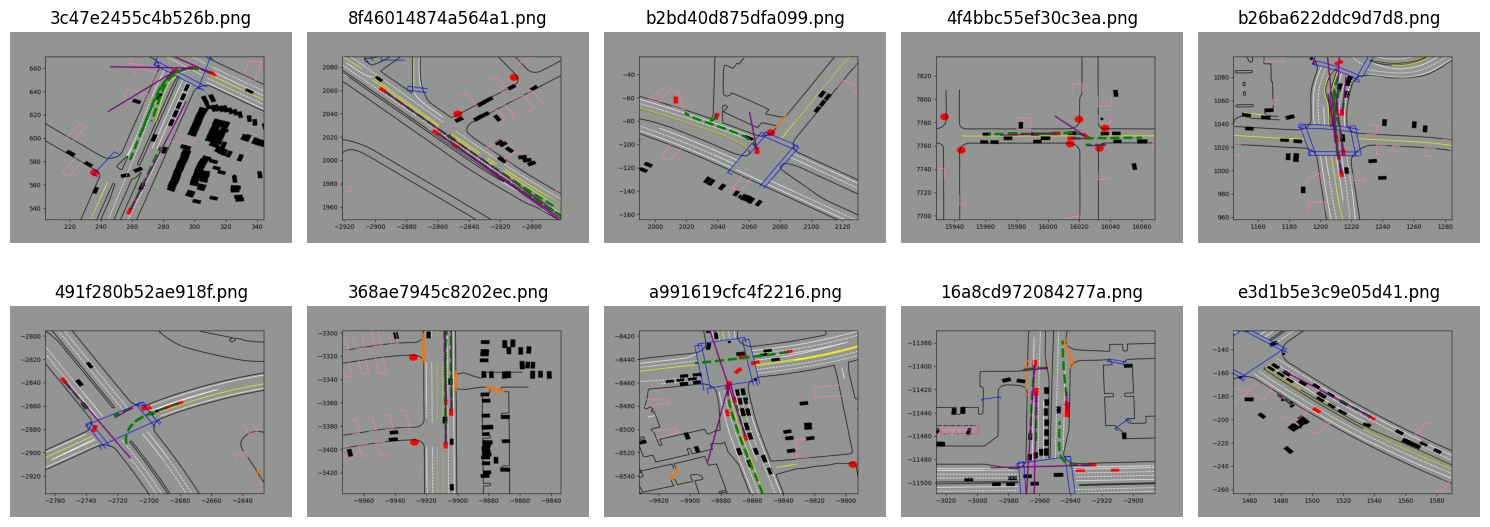

In [ ]:
# Path to the visualization results folder
visualization_folder = "visualization_results_CVM"

# Get all image filenames
image_files = [f for f in os.listdir(visualization_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Select 10 random images
random_images = random.sample(image_files, min(10, len(image_files)))

# Display images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns

for ax, img_name in zip(axes.flatten(), random_images):
    img_path = os.path.join(visualization_folder, img_name)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(img_name)
    ax.axis("off")  # Hide axes

plt.tight_layout()
plt.show()

Q2. Use a constant acceleration model to predict the future trajectories of the target agents at 3s, 5s, and 8s. Then, calculate the Average Displacement Error (ADE) and Final Displacement Error (FDE). The results should be averaged across all target agents and scenarios.

In [ ]:
# Code for Q2
all_fde_3s = []
all_fde_5s = []
all_fde_8s = []
all_ade_3s = []
all_ade_5s = []
all_ade_8s = []

import numpy as np

#########Your can use the following code for reference to load the data and visualize the scenario and agents#########
for file in tqdm(os.listdir(data_path)):
    

    info = np.load(data_path+'/'+file,allow_pickle=True)
    all_agent_trajs        = info['all_agent']    
    
    # You can run below code to see the shape of the all_agent_trajs
    #print("agents matrix shape is: ",all_agent_trajs.shape)  
    # agents matrix shape is:  (Na, 91, 10)
    # [Na agents, 91 timesteps the interval between each timestep is 0.1 second,\
    #10 denotes [center_x, center_y, center_z, boundingbox_x, boundingbox_y, boundingbox_z, heading, vel_x, vel_y, valid] ]
    #the valid flag is either 0 or 1 ; 1 means the valid, 0 means invalid
    obj_types              = info['object_type']
    lane_polylines         = info['lane']           #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    road_polylines         = info['road_polylines'] #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    crosswalk_polylines    = info['crosswalk']      #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    speed_bump_polylines   = info['speed_bump']     #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    stop_signs_polylines   = info['stop_sign']      #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    drive_way_polylines    = info['drive_way']      #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    sdc_track_id           = info['sdc_track_index']   #  the track id of the sdc
    scenario_id            = info['scenario_id']
    
    # We select the 11th timestep as the current timestep to predict the future trajectory of the agents
    all_agent_current = all_agent_trajs[:,10]
    # print(all_agent_current.shape)
    
    #ground truth for the future 3s,5s,8s can be easily derived by :
    predict_horizon = 80
    all_gt_future=all_agent_trajs[:,11:11+predict_horizon]
    all_gt_future.shape
    
    tracks        = info['predict_list']   # the list of agent ids to predict, the agent id is the index in the all_agent_trajs
    tracks
    agents_to_predict = all_agent_trajs[tracks]
    ######################################################
    # The homework should be done on these agents_to_predict.
    # Visualize the agents_to_predict and the scenarios
    # You can use the following code to visualize the scenario
    # For agnets, you can use black color to represent the agents not in the tracks to predict, and use different colors for agents_to_predict
    # You can draw each agent as a rectangle, the center of the rectangle is the center_x and center_y, 
    # and the length and width of the rectangle is boundingbox_x and boundingbox_y
    # We provide a example fig for your reference.   example.png
    sdc_current_state = all_agent_trajs[sdc_track_id][10]
    ax = plt.gca()
    fig = plt.gcf()
    fig.set_facecolor('xkcd:grey') 
    ax.set_facecolor('xkcd:grey')

    # Constants
    dt = 0.1  # Time interval per timestep
    predict_horizon = 80  # Number of future timesteps to predict (8 seconds)

    # Extract observed trajectory (timesteps 0 to 10)
    observed_trajectory = all_agent_trajs[:, :11, :2]  # Shape: (Na, 11, 2)

    # Extract initial positions, velocities, and acceleration from timestep 11
    initial_positions = all_agent_current[:, :2]  # x, y positions at timestep 11
    velocities = all_agent_current[:, 7:9]  # vx, vy velocities at timestep 11

    # Estimate acceleration using difference in velocity from timestep 10 to 11
    previous_velocities = all_agent_trajs[:, 9, 7:9]  # vx, vy at timestep 10
    accelerations = (velocities - previous_velocities) / dt  # Compute acceleration (a_x, a_y)

    # Predict future positions using the constant acceleration model
    timesteps = np.arange(1, predict_horizon + 1).reshape(1, -1, 1)  # Shape: (1, 80, 1)
    predicted_future = (
        initial_positions[:, np.newaxis, :] + 
        velocities[:, np.newaxis, :] * dt * timesteps + 
        0.5 * accelerations[:, np.newaxis, :] * (dt * timesteps) ** 2
    )

    # Combine past trajectory (first 11 timesteps) with predicted trajectory (next 80 timesteps)
    full_predicted_trajectories = np.concatenate((observed_trajectory, predicted_future), axis=1)  # Shape: (Na, 91, 2)

        # Time indices for 3s, 5s, 8s
    time_3s = int(3 / dt)  # 30 timesteps
    time_5s = int(5 / dt)  # 50 timesteps
    time_8s = int(8 / dt)  # 80 timesteps

    valid_agents = np.all(all_gt_future[:, :, -1] == 1, axis=1)  # Agents with all future timesteps valid

    # Extract ground truth final positions
    gt_positions_3s = all_gt_future[valid_agents, time_3s - 1, :2]
    gt_positions_5s = all_gt_future[valid_agents, time_5s - 1, :2]
    gt_positions_8s = all_gt_future[valid_agents, time_8s - 1, :2]

    # Extract predicted final positions
    pred_positions_3s = full_predicted_trajectories[valid_agents, 11 + time_3s - 1, :2]
    pred_positions_5s = full_predicted_trajectories[valid_agents, 11 + time_5s - 1, :2]
    pred_positions_8s = full_predicted_trajectories[valid_agents, 11 + time_8s - 1, :2]

    # Compute FDE
    fde_3s = np.linalg.norm(pred_positions_3s - gt_positions_3s, axis=1)
    fde_5s = np.linalg.norm(pred_positions_5s - gt_positions_5s, axis=1)
    fde_8s = np.linalg.norm(pred_positions_8s - gt_positions_8s, axis=1)


    # Compute ADE (average displacement error)
    # ade_3s = np.mean(np.linalg.norm(pred_positions_3s - gt_positions_3s, axis=2), axis=1)
    # ade_5s = np.mean(np.linalg.norm(pred_positions_5s - gt_positions_5s, axis=2), axis=1)
    # ade_8s = np.mean(np.linalg.norm(pred_positions_8s - gt_positions_8s, axis=2), axis=1)

    if len(fde_3s) > 0:
        mean_fde_3s = np.mean(fde_3s)
        mean_fde_5s = np.mean(fde_5s)
        mean_fde_8s = np.mean(fde_8s)

        # mean_ade_3s = np.mean(ade_3s)
        # mean_ade_5s = np.mean(ade_5s)
        # mean_ade_8s = np.mean(ade_8s)
    else:
        mean_fde_3s, mean_fde_5s, mean_fde_8s = float('nan'), float('nan'), float('nan')
        # mean_ade_3s, mean_ade_5s, mean_ade_8s = float('nan'), float('nan'), float('nan')

    all_fde_3s.append(mean_fde_3s)
    all_fde_5s.append(mean_fde_5s)
    all_fde_8s.append(mean_fde_8s)

    # all_ade_3s.append(mean_ade_3s)
    # all_ade_5s.append(mean_ade_5s)
    # all_ade_8s.append(mean_ade_8s)


    gt_positions_3s = all_gt_future[valid_agents, :time_3s, :2]  # Shape: (N, T, 2)
    gt_positions_5s = all_gt_future[valid_agents, :time_5s, :2]
    gt_positions_8s = all_gt_future[valid_agents, :time_8s, :2]

    pred_positions_3s = full_predicted_trajectories[valid_agents, 11:11 + time_3s, :2]  # Shape: (N, T, 2)
    pred_positions_5s = full_predicted_trajectories[valid_agents, 11:11 + time_5s, :2]
    pred_positions_8s = full_predicted_trajectories[valid_agents, 11:11 + time_8s, :2]



    # Compute ADE
    ade_3s = np.mean(np.linalg.norm(pred_positions_3s - gt_positions_3s, axis=2), axis=1)
    ade_5s = np.mean(np.linalg.norm(pred_positions_5s - gt_positions_5s, axis=2), axis=1)
    ade_8s = np.mean(np.linalg.norm(pred_positions_8s - gt_positions_8s, axis=2), axis=1)

    if len(fde_3s) > 0:
        mean_ade_3s = np.mean(ade_3s)
        mean_ade_5s = np.mean(ade_5s)
        mean_ade_8s = np.mean(ade_8s)
    else:
        mean_ade_3s, mean_ade_5s, mean_ade_8s = float('nan'), float('nan'), float('nan')

    all_ade_3s.append(mean_ade_3s)
    all_ade_5s.append(mean_ade_5s)
    all_ade_8s.append(mean_ade_8s)


    # predicted_trajectories now has shape (Na, 80, 2), where:
    # Na = number of agents, 80 = timesteps, 2 = (x, y)
    for polyline in road_polylines:
        map_type = polyline[0,6]
        if map_type == 6:
            plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='dashed', linewidth=1)
        elif map_type == 7:
            plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
        elif map_type == 8:
            plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
        elif map_type == 9:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dashed', linewidth=1)
        elif map_type == 10:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dashed', linewidth=1)
        elif map_type == 11:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='solid', linewidth=1)
        elif map_type == 12:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='solid', linewidth=1)
        elif map_type == 13:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dotted', linewidth=1)
        elif map_type == 15:
            plt.plot(polyline[:, 0], polyline[:, 1], 'k', linewidth=1)
        elif map_type == 16:
            plt.plot(polyline[:, 0], polyline[:, 1], 'k', linewidth=1)
    
    # Crosswalk Polylines
    for polyline in crosswalk_polylines:
        plt.plot(polyline[:, 0], polyline[:, 1], 'blue', linestyle='solid', linewidth=1)
    
    # Lane Polylines
    for polyline in lane_polylines:
        plt.plot(polyline[:, 0], polyline[:, 1], 'none', linestyle='solid', linewidth=1)

        # Speed Bump Polylines
    for polyline in speed_bump_polylines:
        plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:orange', linestyle='solid', linewidth=2)
    
    # Stop Sign Polylines
    for polyline in stop_signs_polylines:
        x, y, z = polyline[0, :3]  # Extract X, Y, Z coordinates

        # Create an octagon (8-sided polygon)
        octagon = patches.RegularPolygon((x, y), numVertices=8, radius=2.5, 
                                        linewidth=2, edgecolor='red', facecolor='red')

        plt.gca().add_patch(octagon)  # Add octagon to the plot

    # Driveway Polylines
    for polyline in drive_way_polylines:
        plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:pink', linestyle='solid', linewidth=1)
    
    for idx, agent in enumerate(all_agent_current):
        center_x, center_y = agent[0], agent[1]
        bbox_x, bbox_y = agent[3], agent[4]
        heading = agent[6]  # Heading angle in radians
        
        # Determine color: red for agents to predict, black for others
        color = 'red' if idx in tracks else 'black'

        # Create agent rectangle
        rect = patches.Rectangle((-bbox_x / 2, -bbox_y / 2), bbox_x, bbox_y, linewidth=2,
                                edgecolor=color, facecolor=color)

        # Apply rotation and translation
        t = plt.gca().transData
        r = patches.transforms.Affine2D().rotate_deg(np.degrees(heading)).translate(center_x, center_y)
        rect.set_transform(r + t)

        ax.add_patch(rect)

    # Plot ground truth future trajectories for agents where all future timesteps are valid
    for agent_idx in range(all_gt_future.shape[0]):  # Iterate over all agents
        valid_future = all_gt_future[agent_idx, :, -1]  # Extract the validity flag for future timesteps
        
        if np.all(valid_future == 1):  # Only plot if all future timesteps are valid
            future_traj = all_gt_future[agent_idx, :, :2]  # Extract future (x, y) positions
            color = 'green' if agent_idx in tracks else 'none'  # Green for agents to predict, white for others
            plt.plot(future_traj[:, 0], future_traj[:, 1], linestyle='dashed', color=color, linewidth=4)

    # Plot the full predicted trajectories
    for agent_idx in range(full_predicted_trajectories.shape[0]):
        valid_future = all_gt_future[agent_idx, :, -1]

        if np.all(valid_future == 1):
            color = 'purple' if agent_idx in tracks else 'none'   
            plt.plot(full_predicted_trajectories[agent_idx, :, 0], full_predicted_trajectories[agent_idx, :, 1], 
                    linestyle='solid', color=color, linewidth=2)



    ax.axis([-70+ sdc_current_state[0], 70+ sdc_current_state[0], -70+ sdc_current_state[1], 70 + sdc_current_state[1]])

    filename = f'visualization_results_CAM/{scenario_id}.png' 
    plt.savefig(filename)       
    plt.close()



print(f"Mean FDE (3s): {np.mean(all_fde_3s):.3f} meters")
print(f"Mean FDE (5s): {np.mean(all_fde_5s):.3f} meters")
print(f"Mean FDE (8s): {np.mean(all_fde_8s):.3f} meters")

print(f"Mean ADE (3s): {np.mean(all_ade_3s):.3f} meters")
print(f"Mean ADE (5s): {np.mean(all_ade_5s):.3f} meters")
print(f"Mean ADE (8s): {np.mean(all_ade_8s):.3f} meters")


100%|██████████| 287/287 [00:54<00:00,  5.30it/s]

Mean FDE (3s): 59.244 meters
Mean FDE (5s): 73.984 meters
Mean FDE (8s): 111.251 meters
Mean ADE (3s): 53.957 meters
Mean ADE (5s): 58.911 meters
Mean ADE (8s): 71.189 meters


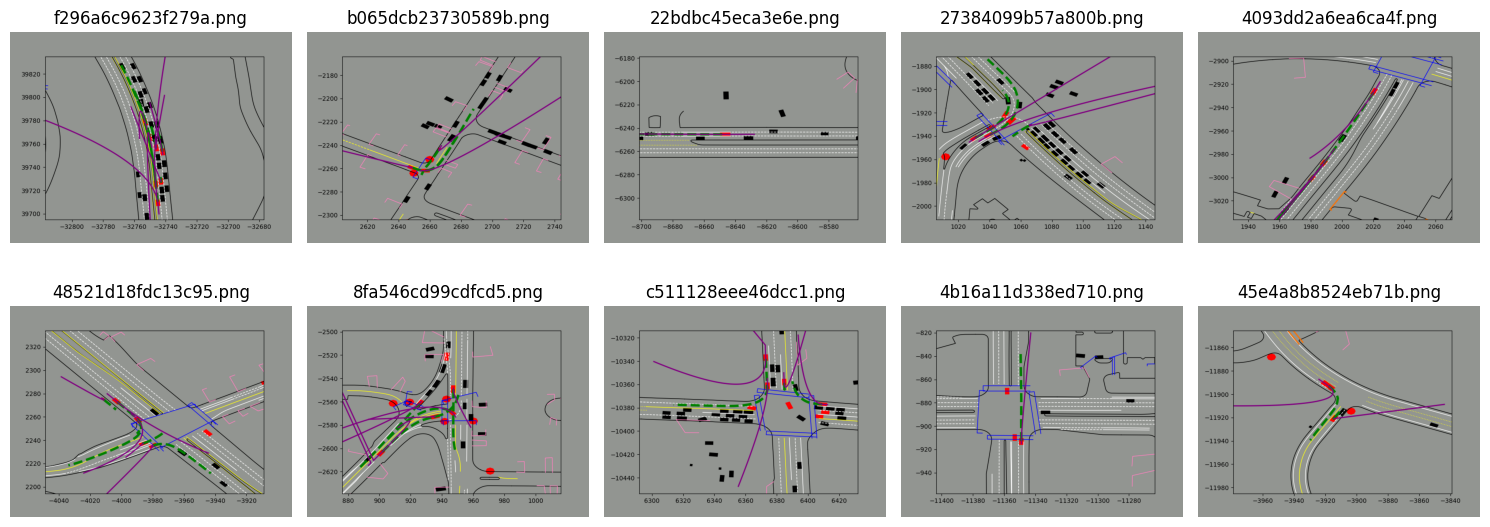

In [31]:
# Path to the visualization results folder
visualization_folder = "visualization_results_CAM"

# Get all image filenames
image_files = [f for f in os.listdir(visualization_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Select 10 random images
random_images = random.sample(image_files, min(10, len(image_files)))

# Display images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns

for ax, img_name in zip(axes.flatten(), random_images):
    img_path = os.path.join(visualization_folder, img_name)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(img_name)
    ax.axis("off")  # Hide axes

plt.tight_layout()
plt.show()

ADE| ADE(3s) | ADE(5s) | ADE(8s) |
FDE| FDE(3s) | FDE(5s) | FDE(8s) |

Briefly discuss the observations from your results. 